In [10]:
import json
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
with open('eval_evolution.json', 'r') as file:
    df_eval = pd.read_json(file)

In [16]:
df_eval

,minimal-catboost,test
DataPrepSteps,[PADRONIZING START_STATION_ID DATA TYPE (VERY ...,[PADRONIZING START_STATION_ID DATA TYPE (VERY ...
Features,"{'categorical_features': ['start_station_id', ...","{'categorical_features': ['start_station_id', ..."
Architecture,"{'preprocess': 'True', 'transform_target': 'Tr...","{'preprocess': 'True', 'transform_target': 'Tr..."
Evaluation,"{'MAE': 1.439, 'MSE': 5.6488, 'RMSE': 2.3765, ...","{'MAE': 1.439, 'MSE': 5.6488, 'RMSE': 2.3765, ..."


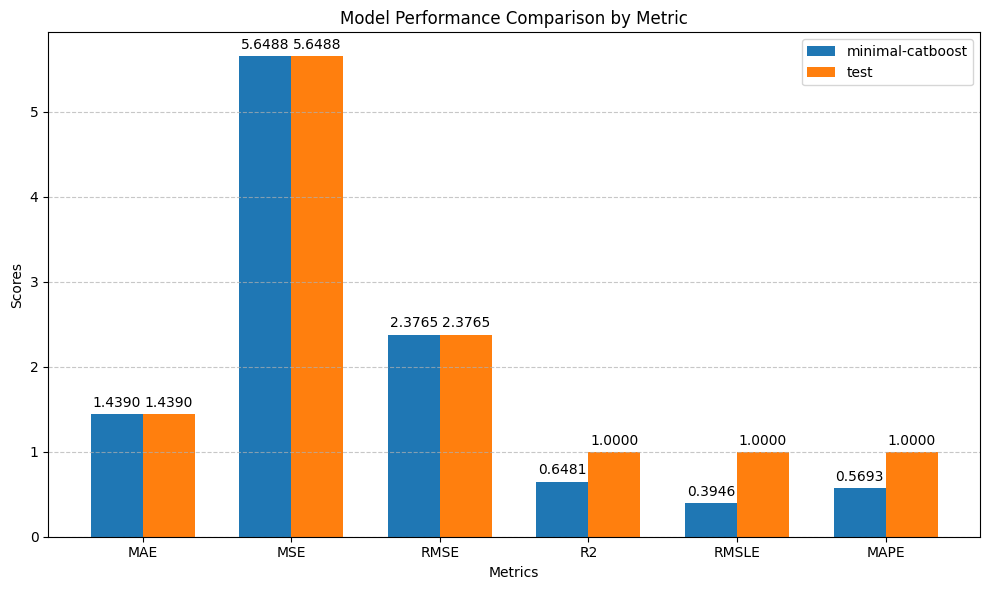

In [23]:
series_names = list(df_eval.keys())
metric_names = list(df_eval[series_names[0]]['Evaluation'].keys())

n_metrics = len(metric_names)
n_series = len(series_names)

values = []
for series_name in series_names:
    series_values = [df_eval[series_name]['Evaluation'][metric] for metric in metric_names]
    values.append(series_values)

bar_width = 0.35  # Width of a single bar
index = np.arange(n_metrics) # The x locations for the groups
fig, ax = plt.subplots(figsize=(10, 6))

for i, series_name in enumerate(series_names):
    position = index + (i - (n_series - 1) / 2) * bar_width
    rects = ax.bar(position, values[i], bar_width, label=series_name)
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',  # Format to 4 decimal places
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison by Metric')
ax.set_xticks(index)
ax.set_xticklabels(metric_names)
ax.legend()
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()